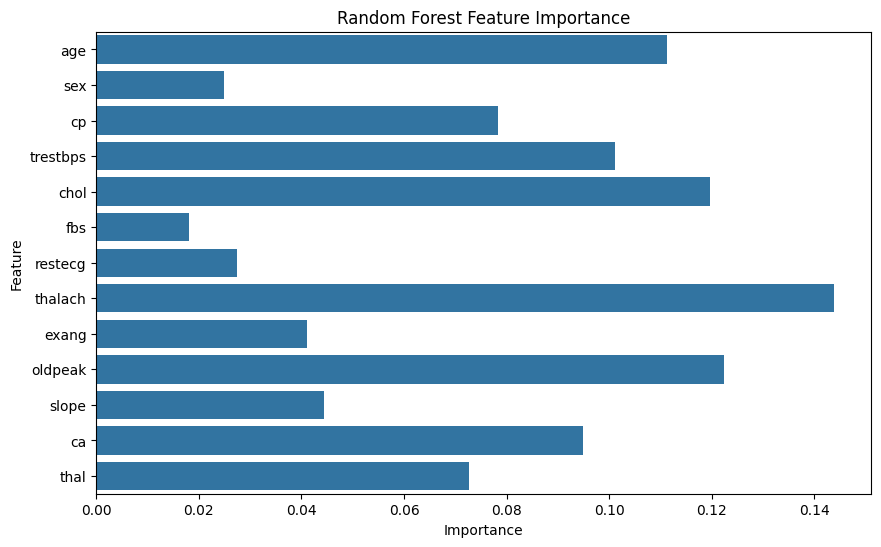

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("processed.cleveland.data", header=None, names=columns)

one_hot_encoded_cols = ['ca','restecg','cp', 'slope','thal']


df = df[~df.isin(['?']).any(axis=1)].reset_index(drop=True)


target = df['target']

df = df.drop('target',axis = 1)

X = df
y= target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Random Forest Feature Importance")
plt.show()

In [15]:
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)  # pick top 8 for example
rfe.fit(X_train, y_train)

rfe_selected = X_train.columns[rfe.support_]
print("RFE Selected Features:", list(rfe_selected))


RFE Selected Features: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(chi2, k=8)  # pick top 8
chi2_selector.fit(X_scaled, y)

chi2_selected = X.columns[chi2_selector.get_support()]
print("Chi-Square Selected Features:", list(chi2_selected))

Chi-Square Selected Features: ['sex', 'cp', 'fbs', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [17]:
selected_features = set( set(rfe_selected) & set(chi2_selected))

X_reduced = X[list(selected_features)]
print("Final Reduced Dataset Shape:", X_reduced.shape)
selected_features

Final Reduced Dataset Shape: (297, 4)


{'ca', 'cp', 'oldpeak', 'thal'}